In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

In [2]:
data = pd.read_csv("./seloger-cleaned.csv")
data.head()

,id,type_of_logement_raw,ville_raw,quartier_raw,room_nb_raw,bedroom_nb_raw,surface_raw,price_raw
0,0,Maison,Triel sur Seine,Nord et Ouest,8.0,4.0,230.00,630000.0
1,1,Appartement,Verneuil sur Seine,Clairieres,4.0,2.0,75.49,170000.0
2,2,Appartement,Meaux,Croix Saint Loup-Saint Nicolas,4.0,3.0,100.18,409500.0
3,3,Appartement,Carrières-sous-Poissy,Apollinaire,2.0,1.0,31.00,129000.0
4,4,Appartement,NaN,NaN,3.0,2.0,64.00,129000.0


In [3]:
data = data.drop(['id'], axis=1)
data.head()

,type_of_logement_raw,ville_raw,quartier_raw,room_nb_raw,bedroom_nb_raw,surface_raw,price_raw
0,Maison,Triel sur Seine,Nord et Ouest,8.0,4.0,230.00,630000.0
1,Appartement,Verneuil sur Seine,Clairieres,4.0,2.0,75.49,170000.0
2,Appartement,Meaux,Croix Saint Loup-Saint Nicolas,4.0,3.0,100.18,409500.0
3,Appartement,Carrières-sous-Poissy,Apollinaire,2.0,1.0,31.00,129000.0
4,Appartement,NaN,NaN,3.0,2.0,64.00,129000.0


In [4]:
data.dropna(subset=['price_raw'],inplace=True)
data.dropna(subset=['quartier_raw'],inplace=True)
data.dropna(subset=['ville_raw'],inplace=True)
data.shape

(4001, 7)

In [5]:
data["room_nb_raw"] = data["room_nb_raw"].fillna(0)
data["bedroom_nb_raw"] = data["bedroom_nb_raw"].fillna(0)
data["surface_raw"] = data["surface_raw"].fillna(0)
data

,type_of_logement_raw,ville_raw,quartier_raw,room_nb_raw,bedroom_nb_raw,surface_raw,price_raw
0,Maison,Triel sur Seine,Nord et Ouest,8.0,4.0,230.00,630000.0
1,Appartement,Verneuil sur Seine,Clairieres,4.0,2.0,75.49,170000.0
2,Appartement,Meaux,Croix Saint Loup-Saint Nicolas,4.0,3.0,100.18,409500.0
3,Appartement,Carrières-sous-Poissy,Apollinaire,2.0,1.0,31.00,129000.0
6,Maison,Sannois,Gabriel Peri,7.0,4.0,185.00,599000.0
...,...,...,...,...,...,...,...
4993,Appartement,Châtenay-Malabry,Petit Chatenay,3.0,2.0,66.00,297000.0
4994,Appartement,Maisons-Alfort,Charentonneau,0.0,0.0,0.00,445000.0
4995,Appartement,Gagny,Gare de Gagny-Henri Barbusse,0.0,0.0,0.00,390000.0
4996,Appartement,Chevilly Larue,La Guinet,3.0,2.0,62.00,258000.0


In [6]:
df = data.iloc[ : , :-1].values
df

array([['Maison', 'Triel sur Seine', 'Nord et Ouest', 8.0, 4.0, 230.0],
       ['Appartement', 'Verneuil sur Seine', 'Clairieres', 4.0, 2.0,
        75.49],
       ['Appartement', 'Meaux', 'Croix Saint Loup-Saint Nicolas', 4.0,
        3.0, 100.18],
       ...,
       ['Appartement', 'Gagny', 'Gare de Gagny-Henri Barbusse', 0.0, 0.0,
        0.0],
       ['Appartement', 'Chevilly Larue', 'La Guinet', 3.0, 2.0, 62.0],
       ['Appartement', 'Puteaux', 'Bergère-Moulin', 4.0, 3.0, 87.0]],
      dtype=object)

In [7]:
label_encoder = LabelEncoder()

In [8]:
df[ : ,0] = label_encoder.fit_transform(df[ : ,0])
df

array([[1, 'Triel sur Seine', 'Nord et Ouest', 8.0, 4.0, 230.0],
       [0, 'Verneuil sur Seine', 'Clairieres', 4.0, 2.0, 75.49],
       [0, 'Meaux', 'Croix Saint Loup-Saint Nicolas', 4.0, 3.0, 100.18],
       ...,
       [0, 'Gagny', 'Gare de Gagny-Henri Barbusse', 0.0, 0.0, 0.0],
       [0, 'Chevilly Larue', 'La Guinet', 3.0, 2.0, 62.0],
       [0, 'Puteaux', 'Bergère-Moulin', 4.0, 3.0, 87.0]], dtype=object)

In [9]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'Appartement': 0, 'Maison': 1}

In [10]:
df[ : ,1] = label_encoder.fit_transform(df[ : ,1])
df

array([[1, 275, 'Nord et Ouest', 8.0, 4.0, 230.0],
       [0, 281, 'Clairieres', 4.0, 2.0, 75.49],
       [0, 161, 'Croix Saint Loup-Saint Nicolas', 4.0, 3.0, 100.18],
       ...,
       [0, 92, 'Gare de Gagny-Henri Barbusse', 0.0, 0.0, 0.0],
       [0, 45, 'La Guinet', 3.0, 2.0, 62.0],
       [0, 228, 'Bergère-Moulin', 4.0, 3.0, 87.0]], dtype=object)

In [11]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'Achères': 0,
 'Alfortville': 1,
 'Andrésy': 2,
 'Antony': 3,
 'Arcueil': 4,
 'Argenteuil': 5,
 'Arpajon': 6,
 'Asnières-sur-Seine': 7,
 'Athis-Mons': 8,
 'Aubergenville': 9,
 'Aubervilliers': 10,
 'Aulnay-sous-Bois': 11,
 'Auvers-sur-Oise': 12,
 'Bagnolet': 13,
 'Beauchamp': 14,
 'Bessancourt': 15,
 'Beynes': 16,
 'Bezons': 17,
 'Bois le Roi': 18,
 'Bois-Colombes': 19,
 "Bois-d'Arcy": 20,
 'Boissy-Saint-Léger': 21,
 'Bondoufle': 22,
 'Bondy': 23,
 'Bonneuil-sur-Marne': 24,
 'Bougival': 25,
 'Boulogne-Billancourt': 26,
 'Bourg-la-Reine': 27,
 'Brie-Comte-Robert': 28,
 'Brunoy': 29,
 'Bry-sur-Marne': 30,
 'Brétigny-sur-Orge': 31,
 'Bussy-Saint-Georges': 32,
 'Cachan': 33,
 'Carrières-sous-Poissy': 34,
 'Cergy': 35,
 'Chambourcy': 36,
 'Champigny-sur-Marne': 37,
 'Champs-sur-Marne': 38,
 'Chanteloup-les-Vignes': 39,
 'Charenton-le-Pont': 40,
 'Chatou': 41,
 'Chaville': 42,
 'Chelles': 43,
 'Chennevières-sur-Marne': 44,
 'Chevilly Larue': 45,
 'Chevreuse': 46,
 'Chilly-Mazarin': 47,
 'Ch

In [12]:
df[ : ,2] = label_encoder.fit_transform(df[ : ,2])
df

array([[1, 275, 729, 8.0, 4.0, 230.0],
       [0, 281, 220, 4.0, 2.0, 75.49],
       [0, 161, 253, 4.0, 3.0, 100.18],
       ...,
       [0, 92, 349, 0.0, 0.0, 0.0],
       [0, 45, 489, 3.0, 2.0, 62.0],
       [0, 228, 73, 4.0, 3.0, 87.0]], dtype=object)

In [13]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'A, Sisley': 0,
 'Adamville': 1,
 'Agent Sarre-Centre-Les Vallées-La Garenne': 2,
 'Agnettes': 3,
 'Aguado': 4,
 'Alfort': 5,
 'Aligre-Gare de Lyon': 6,
 'Allende': 7,
 'Alleray Procession': 8,
 'Alouettes': 9,
 'Alsace': 10,
 'Amandiers': 11,
 'Amiraux-Simplon-Poissonniers': 12,
 'Anatole France': 13,
 'Anatole France-Lepetit et Vergeat': 14,
 'Ancien Centre Ville': 15,
 'Anjou': 16,
 'Apollinaire': 17,
 'Arche Guedon': 18,
 'Archives': 19,
 'Aristide Briand': 20,
 'Aristide Briand-Champagne': 21,
 'Aristide Briand-Saint Hubert-Plateau': 22,
 'Armée Leclerc-Henri Dunant': 23,
 'Armée Leclerc-Jean Allemane': 24,
 'Arpents-Etang-Vignes': 25,
 'Arsenal': 26,
 'Artistes Lyriques-La Theuillerie': 27,
 'Arts et Métiers': 28,
 'Ascott-Village Ouest-Le Verger': 29,
 'Atlantis-Massy Sud': 30,
 'Aubert': 31,
 'Auguste Geneviève-Benoit Malon': 32,
 'Aunettes Ouest': 33,
 'Auteuil Nord': 34,
 'Auteuil Sud': 35,
 'Avenue Nationale': 36,
 'Avenue du Mantois': 37,
 'Bac-Bécon-Flachat-Colombes': 38,

In [14]:
SEED = 42
random.seed(SEED)

In [15]:
VAL_SIZE = 0.2
train, val = train_test_split(data, test_size=VAL_SIZE)

In [16]:
y = data.price_raw
X = df

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2)

In [18]:
standard_x = StandardScaler()

In [19]:
X_train = standard_x.fit_transform(X_train)
X_val = standard_x.transform(X_val)

In [20]:
# pip install tensorflow==2.0

In [22]:
import keras
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l1

seed = 7
np.random.seed(seed)
#tf.set_random_seed(seed)
tf.random.set_seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_absolute_error', optimizer=Adam(lr=0.02))

history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=150, batch_size=127)

Using TensorFlow backend.


Train on 3200 samples, validate on 801 samples
Epoch 1/150
3200/3200 [==============================] - 0s 119us/step - loss: 628013.5356 - val_loss: 446898.1039
Epoch 2/150
3200/3200 [==============================] - 0s 41us/step - loss: 381008.8392 - val_loss: 343936.4587
Epoch 3/150
3200/3200 [==============================] - 0s 33us/step - loss: 327697.1595 - val_loss: 319755.0802
Epoch 4/150
3200/3200 [==============================] - 0s 33us/step - loss: 313650.1991 - val_loss: 308129.3344
Epoch 5/150
3200/3200 [==============================] - 0s 34us/step - loss: 305919.3240 - val_loss: 300200.1642
Epoch 6/150
3200/3200 [==============================] - 0s 33us/step - loss: 299390.1273 - val_loss: 292142.1137
Epoch 7/150
3200/3200 [==============================] - 0s 33us/step - loss: 291684.4022 - val_loss: 298385.5734
Epoch 8/150
3200/3200 [==============================] - 0s 35us/step - loss: 287337.2002 - val_loss: 269694.6621
Epoch 9/150
3200/3200 [=================

Epoch 72/150
3200/3200 [==============================] - 0s 32us/step - loss: 224082.6403 - val_loss: 236895.4679
Epoch 73/150
3200/3200 [==============================] - 0s 31us/step - loss: 221098.6382 - val_loss: 230963.7277
Epoch 74/150
3200/3200 [==============================] - 0s 32us/step - loss: 226360.9748 - val_loss: 228950.1876
Epoch 75/150
3200/3200 [==============================] - 0s 32us/step - loss: 220918.4642 - val_loss: 228733.9344
Epoch 76/150
3200/3200 [==============================] - 0s 31us/step - loss: 217087.8417 - val_loss: 225075.2844
Epoch 77/150
3200/3200 [==============================] - 0s 32us/step - loss: 216514.8697 - val_loss: 222576.9278
Epoch 78/150
3200/3200 [==============================] - 0s 38us/step - loss: 214308.2436 - val_loss: 222927.2232
Epoch 79/150
3200/3200 [==============================] - 0s 40us/step - loss: 216083.6402 - val_loss: 220892.0218
Epoch 80/150
3200/3200 [==============================] - 0s 42us/step - loss: 2

3200/3200 [==============================] - 0s 33us/step - loss: 188849.4036 - val_loss: 214549.6018
Epoch 143/150
3200/3200 [==============================] - 0s 32us/step - loss: 192293.9170 - val_loss: 212416.0140
Epoch 144/150
3200/3200 [==============================] - 0s 32us/step - loss: 185660.8734 - val_loss: 213213.3908
Epoch 145/150
3200/3200 [==============================] - 0s 32us/step - loss: 191624.4462 - val_loss: 217629.2872
Epoch 146/150
3200/3200 [==============================] - 0s 35us/step - loss: 185367.4129 - val_loss: 209151.6654
Epoch 147/150
3200/3200 [==============================] - 0s 35us/step - loss: 184883.1472 - val_loss: 214172.4440
Epoch 148/150
3200/3200 [==============================] - 0s 31us/step - loss: 188433.3981 - val_loss: 211673.3865
Epoch 149/150
3200/3200 [==============================] - 0s 32us/step - loss: 186857.8721 - val_loss: 210510.8136
Epoch 150/150
3200/3200 [==============================] - 0s 31us/step - loss: 183577

In [23]:
# Evaluation on the test set created by train_test_split
model.evaluate(X_train, y_train)

3200/3200 [==============================] - 0s 47us/step


188140.411640625

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               1400      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 27,851
Trainable params: 27,851
Non-trainable params: 0
_________________________________________________________________


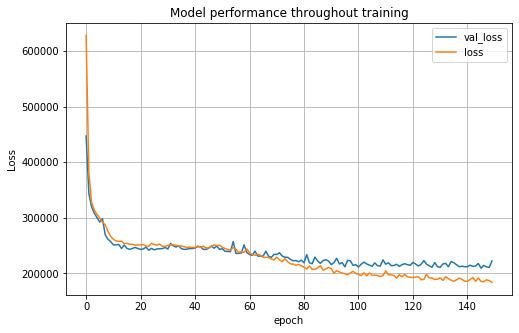

In [25]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [26]:
y_val_predict = model.predict(X_val)
y_val_predict

array([[ 694577.5 ],
       [1145250.5 ],
       [ 194180.8 ],
       [ 447028.7 ],
       [ 226638.06],
       [ 322679.84],
       [ 272882.2 ],
       [1122277.5 ],
       [ 547942.44],
       [ 213244.95],
       [ 518407.78],
       [ 360794.72],
       [ 224566.4 ],
       [ 300908.6 ],
       [ 505905.06],
       [ 824626.2 ],
       [ 549513.6 ],
       [ 391416.3 ],
       [ 251695.45],
       [ 781013.6 ],
       [ 195927.53],
       [ 670678.6 ],
       [1140071.2 ],
       [1412178.9 ],
       [ 174405.47],
       [ 363724.16],
       [1090209.8 ],
       [ 189519.03],
       [ 446315.75],
       [ 420981.34],
       [ 843893.44],
       [ 677832.25],
       [ 223581.77],
       [1081165.2 ],
       [ 272670.94],
       [ 692104.4 ],
       [1160373.1 ],
       [ 330370.3 ],
       [ 424516.88],
       [ 948975.06],
       [ 266795.16],
       [ 574454.75],
       [ 249862.33],
       [ 651504.5 ],
       [ 912161.44],
       [ 363784.2 ],
       [ 422961.66],
       [ 3043

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, y_val_predict)

222346.93642712236

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
root_mean_squared_error = sqrt(mean_squared_error(y_val, y_val_predict))
print(root_mean_squared_error)

391434.3473785979


In [29]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [30]:
import numpy as np
MAPE = round(mean_absolute_percentage_error(y_val, y_val_predict), 2)
print(MAPE)

128.28
